

<h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 30px; color: #081c15; text-align: center; line-height: 1.25;">Classification Problem<br><span style="color: #1b4332; font-size: 48px"><b>🚢🧊🌊 Titanic with LazyClassifier🚢🧊🌊 </b>
 <hr>
    
<h1 style="font-family: Trebuchet MS; font-size: 14px; color: #264653; text-align: right; "><strong>Created By: Hassane Skikri</strong></h1>



<hr>
<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">Table of Contents</p>
<hr>


## **What is covered in this notebook?**

 - [**1 - Importing Libraries**](#1)
 - [**2 - Loading Dataset**](#2)
 - [**3 - Exploring the data**](#3)
 - [**4 - Data Preprocessing**](#4)
 - [**5 - Feature Scaling**](#5)
 - [**6 - Model Building and Evaluation**](#6)
 - [**7 - Hyperparameter Tuning**](#7)
 - [**8 - Preparing the Final Submission:**](#9)
<hr>

# 1 - Importing Libraries

<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">1️⃣ - Importing libraries</p>
<hr>


In [1]:
# Data Analysis and Manipulation Libraries Import
import numpy as np 
import pandas as pd 

# Data Visualization Libraries Import
import  matplotlib.pyplot as plt
import seaborn as sns

#Splitting the data
from sklearn.model_selection import StratifiedShuffleSplit

#Custom Transformer Class for Data Imputation
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer

#encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#calling the pipeline
from sklearn.pipeline import Pipeline

#Scaling
from sklearn.preprocessing import StandardScaler

#data spliting 
from sklearn.model_selection import train_test_split

import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#ignore all the warning 
import warnings
warnings.filterwarnings('ignore')

print("setep completed")

setep completed


In [3]:
#display Matplotlib plots directly within the notebook
%matplotlib inline
# display graphs correctly
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['figure.dpi'] = 120

# Apply the 'ggplot' style
plt.style.use('dark_background')


<hr>
<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">2️⃣ - Loading Dataset</p>
<a name = 2 > </a>
<hr>


# 2 - Loading Dataset

In [4]:
titanic = pd.read_csv('..Data/train.csv')
titanic_test = pd.read_csv('..Data/test.csv')
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
titanic.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

In [6]:
titanic.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64


<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">3️⃣ - Exploring the data</p>
<a name = 3 ></a>
<hr>


# 3 - Exploring the data

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### **From this information, we can summarize:**
- **There are categorical features in the data. So we need to encode them into numeric features.**
- **3 column has missing values.**


## **Visualizing the correlations**

<Axes: >

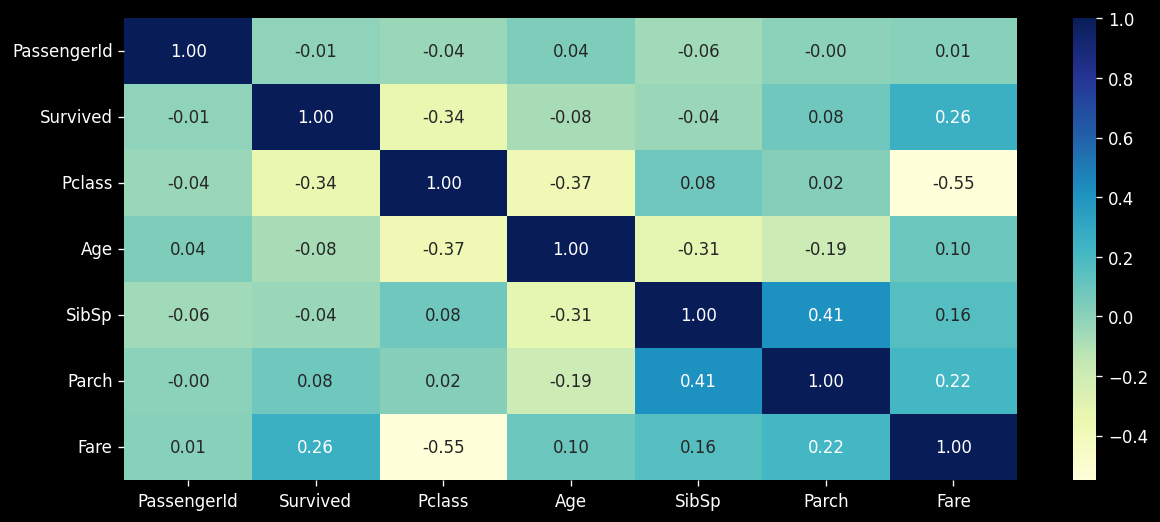

In [10]:
# Select only numeric columns
numeric_columns = titanic.select_dtypes(include=['number'])

# Calculate correlations and create the heatmap
corr = numeric_columns.corr()
sns.heatmap(corr, annot=True, fmt='.2f',cmap="YlGnBu")

***we can conclude that there is a small reverse corrolation between the Pclass and the Survived column***

<hr>
<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">4️⃣ - Data Preprocessing</p>
<a name = 4 ></a>
<hr>


# 4 - Data Preprocessing

## Splitting the data into training and testing sets

In [11]:
X = titanic.drop('Survived', axis=1)  # Features
y = titanic['Survived']               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

<Axes: xlabel='Survived', ylabel='Count'>

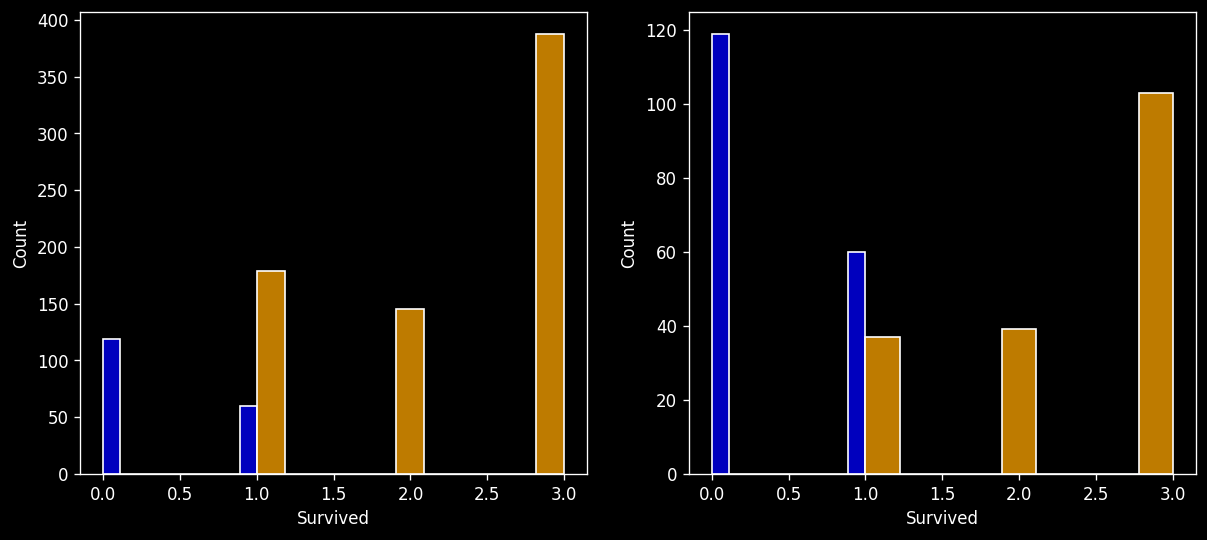

In [12]:
plt.subplot(1,2,1)
sns.histplot(y_test,color='blue')
sns.histplot(X_train['Pclass'],color='orange')
plt.subplot(1,2,2)
sns.histplot(y_test,color='blue')
sns.histplot(X_test['Pclass'],color='orange')


In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 42 to 122
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          570 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        169 non-null    object 
 10  Embarked     710 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


**we can see that the age has a lot of missing value**
<br>
**the cabin column isn't important so we will drop it**

## Handling missing values in the Age column.

In [14]:
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit (self, X,y=None):
        return self
    def transform(self,X):
        imputer = SimpleImputer(strategy = "mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [15]:
X_train["Embarked"].unique()

array(['C', 'S', 'Q', nan], dtype=object)

## Encoding categorical features ('Embarked' and 'Sex')

In [16]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit (self,X):
        return self
    def transform(self,X):
        encoder = OneHotEncoder()
        
        matrix= encoder.fit_transform(X[['Embarked']]).toarray()
        columns = ["C","S","Q","N"]
        for i in range(len(matrix.T)):
            X[columns[i]]= matrix.T[i]
        
        matrix = encoder.fit_transform(X[["Sex"]]).toarray()
        columns = ["Female","Male"]
        for i in range(len(matrix.T)):
            X[columns[i]]= matrix.T[i]
        return X

## Dropping unnecessary columns.

In [17]:
#feature dropper

class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self , X , y =None):
        return self
    def transform(self , X ):
        return X.drop(["Name","Sex","Embarked","Ticket","Cabin","N"], axis =1, errors = "ignore")


## Pipeline

In [18]:
pipeline = Pipeline([("ageimputer",AgeImputer()),
                    ("featureencoder",FeatureEncoder()),
                    ("featuredropper",FeatureDropper())])

In [19]:
X_train.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
42,43,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C
684,685,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,NaN,S


In [20]:
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.fit_transform(X_test)
passenger_id = titanic_test['PassengerId']
titanic_test = pipeline.fit_transform(titanic_test)

In [21]:
X_train.head(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
42,43,3,30.020474,0,0,7.8958,1.0,0.0,0.0,0.0,1.0
684,685,2,60.000000,1,1,39.0000,0.0,0.0,1.0,0.0,1.0


In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 42 to 122
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Age          712 non-null    float64
 3   SibSp        712 non-null    int64  
 4   Parch        712 non-null    int64  
 5   Fare         712 non-null    float64
 6   C            712 non-null    float64
 7   S            712 non-null    float64
 8   Q            712 non-null    float64
 9   Female       712 non-null    float64
 10  Male         712 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 66.8 KB



<hr>

<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">5️⃣ - Feature Scaling</p>
<a name = 5 ></a>
<hr>


# 5 - Feature Scaling

In [23]:
#ensure that all features have similar scales
scaler = StandardScaler()
X_train_data =  scaler.fit_transform(X_train)
y_train_data = y_train.to_numpy()  #  convert a Pandas Series into a NumPy array.

In [24]:
X_train_data = pd.DataFrame(X_train_data,columns = X_test.columns)

In [25]:
X_test_data =  scaler.fit_transform(X_test)
y_test_data = y_test.to_numpy()  

X_test_data = pd.DataFrame(X_test_data,columns = X_train.columns)

In [26]:
titanic_test = scaler.fit_transform(titanic_test)

**for each column. we can see that the mean is close to 0 and the standard deviation is close to 1.**



<hr>

<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">6️⃣ - Model Building and Evaluation using  LazyClassifier</p>
<a name = 6 ></a>
<hr>


## Selecting the best model based on performance.

In [27]:
!pip install lazypredict

In [28]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

models, predictions = clf.fit(X_train_data, X_test_data, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:02<00:00, 13.21it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.85               0.82     0.82      0.85   
RandomForestClassifier             0.86               0.82     0.82      0.86   
LGBMClassifier                     0.85               0.82     0.82      0.85   
LabelSpreading                     0.84               0.81     0.81      0.84   
LabelPropagation                   0.84               0.81     0.81      0.84   
ExtraTreesClassifier               0.84               0.80     0.80      0.84   
LogisticRegression                 0.83               0.80     0.80      0.83   
BaggingClassifier                  0.83               0.80     0.80      0.83   
SVC                                0.84               0.80     0.80      0.83   
LinearDiscriminantAnalysis         0.83               0.80     0.80      0.82   
RidgeClassifierCV           

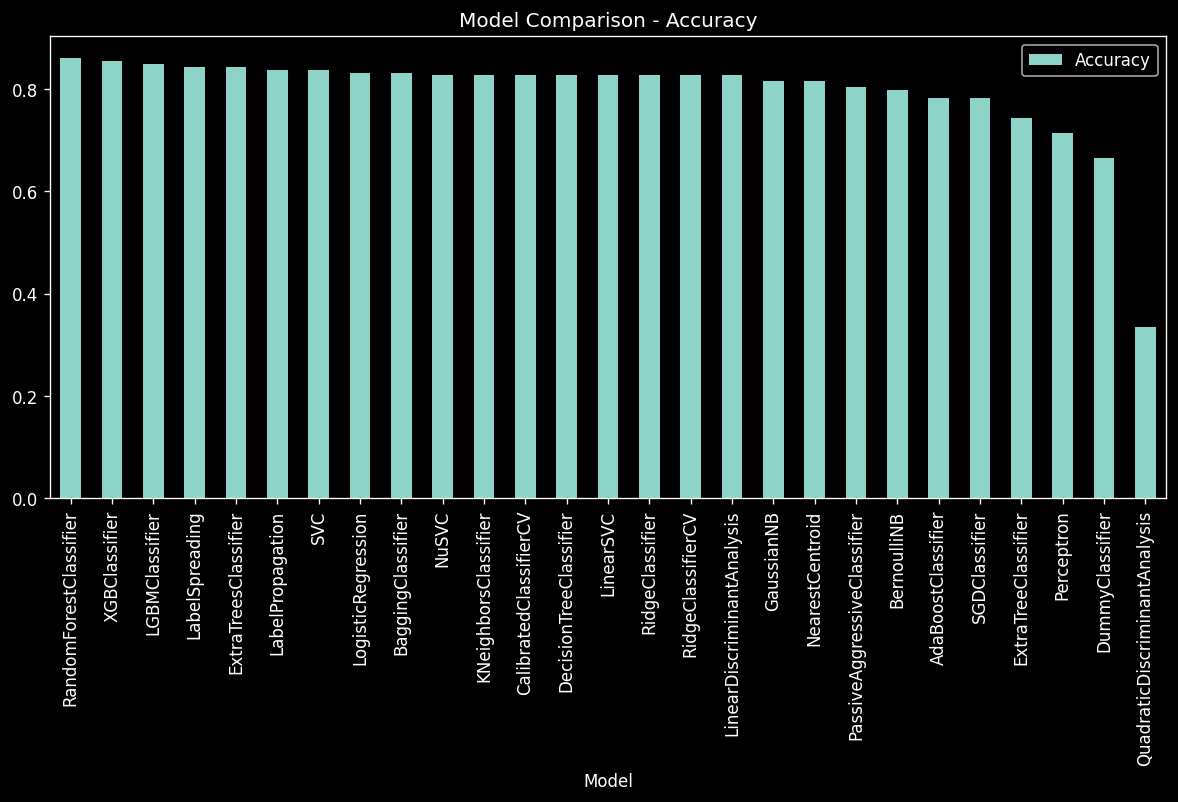

In [29]:
models.sort_values('Accuracy', ascending=False).plot(kind='bar', y='Accuracy')
plt.title('Model Comparison - Accuracy')
plt.show()


<hr>

<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">7️⃣ -  Fine-Tuning with Optuna:</p>
<a name = 7 ></a>
<hr>


# 7 -  Fine-Tuning with Optuna:

In [30]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 25, 500)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 15)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                 min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                 random_state=42)
    clf.fit(X_train_data, y_train)
    return accuracy_score(y_test, clf.predict(X_test_data))

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-03-19 18:31:54,811] A new study created in memory with name: no-name-7fc30109-67b4-4a3d-9dbc-f8ce4cfbdd51
[I 2024-03-19 18:31:54,890] Trial 0 finished with value: 0.8379888268156425 and parameters: {'n_estimators': 39, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8379888268156425.
[I 2024-03-19 18:31:55,578] Trial 1 finished with value: 0.8268156424581006 and parameters: {'n_estimators': 455, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8379888268156425.
[I 2024-03-19 18:31:56,073] Trial 2 finished with value: 0.8435754189944135 and parameters: {'n_estimators': 305, 'max_depth': 21, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 2 with value: 0.8435754189944135.
[I 2024-03-19 18:31:56,284] Trial 3 finished with value: 0.8435754189944135 and parameters: {'n_estimators': 123, 'max_depth': 24, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 2 with value: 

In [31]:
best_params = study.best_params
print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 62, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 1}


In [32]:
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train_data, y_train)

RandomForestClassifier(max_depth=11, min_samples_split=3, n_estimators=62,
                       random_state=42)

In [33]:
accuracy = best_model.score(X_test_data, y_test)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.8603351955307262


In [34]:
# # Get feature importances
# importances = best_model.feature_importances_

# # Transform these importances into a DataFrame for easier visualization
# feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)

# # Optionally, plot the feature importances
# feature_importances.plot(kind='bar')

In [35]:
# # Select a subset of features deemed most important

# selected_features = feature_importances[feature_importances['Importance'] > 0].index.tolist()

# # Re-train the model or perform further analysis using the selected features
# X_train_selected = X_train[selected_features]
# X_test_selected = X_test[selected_features]

In [36]:
# best_model = RandomForestClassifier(**best_params, random_state=42)
# best_model.fit(X_train_selected , y_train)
# accuracy = best_model.score(X_test_selected, y_test)
# print("Accuracy on Test Set:", accuracy)

In [37]:
# it donsn't improve the model prediction



<hr>

<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">9️⃣ - Preparing the Final Submission</p>
<a name = 9 ></a>
<hr>




# 9- Preparing the Final Submission

In [38]:
titanic_test = pd.DataFrame(titanic_test,columns = X_train.columns)

In [39]:
imputer = SimpleImputer(strategy = "median")
titanic_test['Fare'] = imputer.fit_transform(titanic_test[['Fare']])


In [40]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    float64
 1   Pclass       418 non-null    float64
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    float64
 4   Parch        418 non-null    float64
 5   Fare         418 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(11)
memory usage: 36.0 KB


In [41]:
predictions = best_model.predict(titanic_test)

In [42]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [43]:
final_df = pd.DataFrame(passenger_id)
final_df['Survived'] = predictions
final_df.to_csv("/kaggle/working/data_predictions.csv",index =False)


In [44]:
final_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


<h1 style="font-family: Trebuchet MS; font-size: 20px; color: #1b4332; text-align: center; ">
  <b>If you have any feedback or suggestions on how to enhance the model's performance, please feel free to share them in the comments below. Your insights are valuable and can help us refine our approach to achieve better results.</b>
</h1>


<h1 style="font-family: Trebuchet MS; font-size: 30px; color: #1b4332; text-align: center; "><b>Thank You</b></h1>